# Installing and importing dependencies

In [1]:
!pip install openpyxl
!pip install pandas
!pip install numpy
!pip install rdkit

In [14]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

Function that will be used to check that no "na" values appear:

In [3]:
def check_no_na(data):
    if data.isna().sum().eq(0).all():
        print("Success: No NA values found.")
        return
    print("Warning: NA values found.")

# Importing the dataset

In [4]:
df_raw=pd.read_excel("denmark.xlsx")
df_raw.head()

,Catalyst,Imine,Thiol,Output
0,O=P1(O)OC2=C(C3=C(C4CCCCC4)C=C(C5CCCCC5)C=C3C6...,O=C(C1=CC=CC=C1)/N=C/C2=CC=C(Cl)C=C2Cl,SC1=CC=CC=C1C,3.134625
1,O=P1(O)OC2=C(C3=CC(C4=C(C)C=C(C)C=C4C)=CC(C5=C...,O=C(C1=CC=CC=C1)/N=C/C2=CC=C(OC)C=C2,SC1=CC=C(OC)C=C1,1.531803
2,O=P1(O)OC2=C(C3=CC=C(OC)C=C3)C=C4C(C=CC=C4)=C2...,O=C(C1=CC=CC=C1)/N=C/C2=CC=C(Cl)C=C2Cl,SC1=CC=CC=C1,1.074991
3,O=P1(O)OC2=[C@]([C@]3=C(Cl)C=C(Cl)C=C3Cl)C=C4C...,O=C(C1=CC=CC=C1)/N=C/C2=CC=C(OC)C=C2,SC1=CC=CC=C1C,1.334823
4,O=P1(O)OC2=C(C3=C(C=CC4=CC=CC(C=C5)=C46)C6=C5C...,O=C(C1=CC=CC=C1)/N=C/C2=CC=CC3=C2C=CC=C3,SC1=CC=CC=C1,1.743658


# Looking at the data

### Target values

First of all, it would be important to look at how output values are distributed:

In [5]:
df_raw.describe()

,Output
count,1075.000000
mean,0.987658
std,0.700524
min,-0.419378
25%,0.473820
50%,1.050757
75%,1.370104
max,3.134625


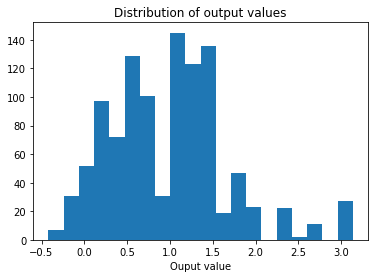

In [30]:
plt.hist(x=df_raw["Output"], bins=20);
plt.title("Distribution of output values")
plt.xlabel("Ouput value");

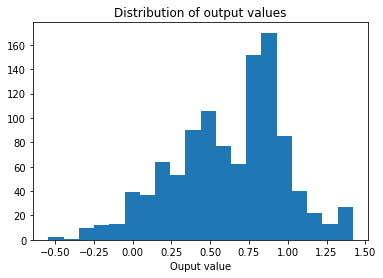

In [32]:
plt.hist(x=df_raw["Output"].apply(np.log1p), bins=20);
plt.title("Distribution of output values")
plt.xlabel("Ouput value");

Here, it should be noted that 

### Features

Are there any "na" values?

In [6]:
check_no_na(df_raw)

Success: No NA values found.


How many different molecules are there?

In [7]:
unique_catalysts=df_raw["Catalyst"].unique()
unique_imines=df_raw["Imine"].unique()
unique_thiols=df_raw["Thiol"].unique()
pd.DataFrame({"Unique Catalysts": [unique_catalysts.shape[0]], "Unique Imines": [unique_imines.shape[0]], "Unique Thiols": [unique_thiols.shape[0]]})

,Unique Catalysts,Unique Imines,Unique Thiols
0,43,5,5


Here, one could use One-hot encoding for the Imines and Thiols. This idea was discarded since in the case another Thiol or Imine is added, one would have to retrain the model instead of being able to fine-tune it. 

Show 3 random different Catalysts:

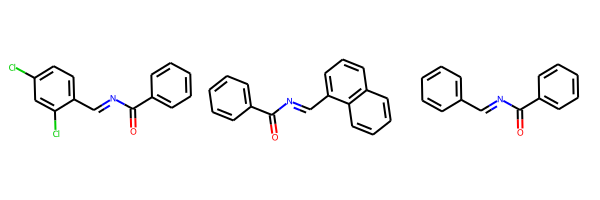

In [8]:
mol_list=[]
unique_molecules=df_raw["Imine"].unique()
for i in range(3):
    index=np.random.randint(0, unique_molecules.shape[0])
    mol_list.append(Chem.MolFromSmiles(unique_molecules[index]))
    unique_molecules=np.delete(unique_molecules,index)
Draw.MolsToGridImage(mol_list)

Show 3 random different Imine:

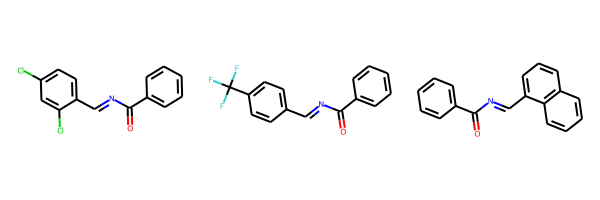

In [9]:
mol_list=[]
unique_molecules=df_raw["Imine"].unique()
for i in range(3):
    index=np.random.randint(0, unique_molecules.shape[0])
    mol_list.append(Chem.MolFromSmiles(unique_molecules[index]))
    unique_molecules=np.delete(unique_molecules,index)
Draw.MolsToGridImage(mol_list)

Show 3 random different Thiol:

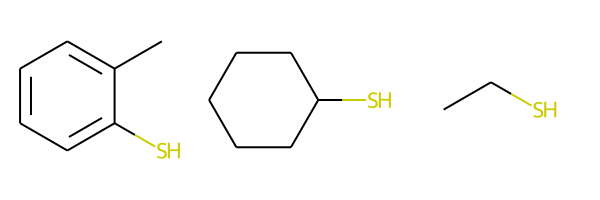

In [10]:
mol_list=[]
unique_molecules=df_raw["Thiol"].unique()
for i in range(3):
    index=np.random.randint(0, unique_molecules.shape[0])
    mol_list.append(Chem.MolFromSmiles(unique_molecules[index]))
    unique_molecules=np.delete(unique_molecules, index)
Draw.MolsToGridImage(mol_list)

# Preprocessing

Translating the "Catalyst", the "Imine" and the "Thiol" columns from SMILES to a RDKit molecule:

In [11]:
df_molecule_obj=df_raw[["Catalyst", "Imine", "Thiol"]].applymap(Chem.MolFromSmiles)
df_y=df_raw["Output"]
df_molecule_obj.head()

,Catalyst,Imine,Thiol
0,<rdkit.Chem.rdchem.Mol object at 0x7fb45c7479e0>,<rdkit.Chem.rdchem.Mol object at 0x7fb45c7471c0>,<rdkit.Chem.rdchem.Mol object at 0x7fb45c6a3ad0>
1,<rdkit.Chem.rdchem.Mol object at 0x7fb45c751210>,<rdkit.Chem.rdchem.Mol object at 0x7fb45c6a39e0>,<rdkit.Chem.rdchem.Mol object at 0x7fb45c6a3a30>
2,<rdkit.Chem.rdchem.Mol object at 0x7fb45c751120>,<rdkit.Chem.rdchem.Mol object at 0x7fb45c6a3990>,<rdkit.Chem.rdchem.Mol object at 0x7fb45c68c3a0>
3,<rdkit.Chem.rdchem.Mol object at 0x7fb45c7511c0>,<rdkit.Chem.rdchem.Mol object at 0x7fb45c6a3bc0>,<rdkit.Chem.rdchem.Mol object at 0x7fb45c68c350>
4,<rdkit.Chem.rdchem.Mol object at 0x7fb45c751030>,<rdkit.Chem.rdchem.Mol object at 0x7fb45c6a3c10>,<rdkit.Chem.rdchem.Mol object at 0x7fb45c68c300>


Verifying that all the smiles transfered successfuly. The RDKit documentaton states:

>or None on failure:
>
>> ```m = Chem.MolFromMolFile('data/invalid.mol')```
>>
>> ```m is None```
>
>True

So the "na" instances are counted and should be 0 if no problems were encountered:

In [12]:
check_no_na(df_molecule_obj)

Success: No NA values found.


idea: use qsar fingerprints: http://www.qsar4u.com/files/qsar_rdkit_tutorial/qsar-rdkit.html

idea: https://pubs.acs.org/doi/10.1021/acs.jcim.7b00616


In [13]:
def preprocessing(df_raw, n_bit, n_atom):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-13-43e58012c709>, line 2)

In [ ]:
pipeline = Pipeline([( "scaler" , StandardScaler()),
                       ("rf",RandomForestClassifier())])
